# Hetroschedasticity: Consequences, detection and solutions

By **homoskedasticity** we mean that the variance of the unobservable errorconditional on explanatory variables, is constant. Error variance may be heteroskedastic sometimes. The reason is that the variation in the dependent variable seldom remains constant when the level of one (or more) explanatory variable(s) increases or decreases. For example, not only is the level of consumption of the rich much higher than that of the poor, but it is also more varied. The poor have few options but to spend their income on the
basic essentials of life; the rich enjoy the privilege of making choices. Similarly, there tends to be much less variation in output or expenditure levels among small enterprises than among large firms. The implication for  statistical analysis is that you will not be able to apply the egression
model to the data straight away. Like non-linearity, heteroskedasticity is also often due to the skewness in the distribution of the variables under study. As a result, a suitable transformation can make the
heteroskedasticity disappear while making the average relationship linear at the same time. In other words, the least squares estimators would be unbiased and consistent.However, the standard formulae for the standard errors will not be valid, since they are based on the assumption of homoskedasticity.

## Consequences

- OLS is still unbiased and consistent (unbiased is a small sample property i.e. for a given sample) Consistent is a large sample property.

- $\widehat{\beta }$ is not efficient. i.e. $var(\widehat{\beta })$ is biased and inefficient

- Biased \ $var(\widehat{\beta })$ invalidates  the tests of significance

We can easily verify that under homoskedasticity for a simple regression the variance of slope coefficient $var(\widehat{\beta })=\frac{\sigma ^{2}}{\sum(x-\bar{x})^2}.$

If errors are heteroschedacitic we  can show that the estimator of the varioance of $\hat{\beta}$ i.e $\frac{s ^{2}}{\sum(x-\bar{x})^2}$ understates the true variance and hence the t-statistic reported for$\beta =0$ is overblown, and the confidence
interval for $\beta $ is tighter than it is supposed to be. This means that the t-statistic in this case is biased towards rejecting $H_{0}:\beta =0$ i.e., showing significance of the regression slope coefficient, when it may
not be significant.



**Example**What are the factors that determine the abortion rate across the 50 states in the
USA? (Gujarati)
The variables used in the analysis are as follows:
- _State_ = name of the state (50 US states).
- _ABR_ = Abortion rate, number of abortions per thousand women aged 15–44 in
1992.
- _Relig_ion_ = the percent of a state’s population that is Catholic, Southern Baptist,Evangelical, or Mormon.
- _Price_ = the average price charged in 1993 in non-hospital facilities for an abortion at 10 weeks with local anesthesia (weighted by the number of abortions performed in 1992).
- _Laws_ = a variable that takes the value of 1 if a state enforces a law that restricts a minor’s access to abortion, 0 otherwise.
- _Funds_ = a variable that takes the value of 1 if state funds are available for use to pay for an abortion under most circumstances, 0 otherwise.
- _Educ_ = the percent of a state’s population that is 25 years or older with a high school degree (or equivalent), 1990.
- _Income_ = disposable income per capita, 1992.
- _Picket_ = the percentage of respondents that reported experiencing picketing with physical contact or blocking of patients.

**Model**
$$ABR_i= \beta_0+ \beta_1 Price_i+ \beta_2Laws_i+ \beta_3 Funds_i+\beta_4Educ_i+ \beta_5Rel_i +\beta_6Income_i+ \beta_7 Picket_i+ \varepsilon_i$$
i= 1,...50

A priori, we would expect ABR to be negatively related to religion, price, laws,picket, education, and positively related to fund and income. We assume the error term satisfies the IC assumptions.

In [49]:
data <- read.csv("Hetro.csv",header=T)

In [3]:
head(data)

,state,abortion,religion,price,laws,funds,educ,income,picket,lnabortion
,<chr>,<dbl>,<dbl>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>
1,MISSISSIPPI,12.4,38.0,256,0,0,64.3,14082,100,2.517696
2,NEW_MEXICO,17.7,44.7,332,0,0,75.1,15458,20,2.873565
3,UTAH,9.3,76.7,298,1,0,85.1,15573,0,2.230014
4,WEST_VIRGINIA,7.7,9.8,251,0,1,66.0,15598,50,2.041220
5,ARKANSAS,13.5,30.0,248,1,0,66.3,15635,33,2.602690
6,LOUISIANA,13.4,50.9,228,1,0,68.3,15931,60,2.595255


In [7]:
mod1 <- lm(abortion~price+laws+funds+educ+religion+income+picket,data=data)
summary(mod1)


Call:
lm(formula = abortion ~ price + laws + funds + educ + religion + 
    income + picket, data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-11.6110  -4.6493  -0.6696   4.5253  15.9514 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) 14.2839573 15.0776294   0.947   0.3489    
price       -0.0423631  0.0222232  -1.906   0.0635 .  
laws        -0.8731018  2.3765662  -0.367   0.7152    
funds        2.8200030  2.7834747   1.013   0.3168    
educ        -0.2872551  0.1995545  -1.439   0.1574    
religion     0.0200709  0.0863805   0.232   0.8174    
income       0.0024007  0.0004552   5.274 4.35e-06 ***
picket      -0.1168712  0.0421799  -2.771   0.0083 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 7.063 on 42 degrees of freedom
Multiple R-squared:  0.5774,	Adjusted R-squared:  0.507 
F-statistic: 8.199 on 7 and 42 DF,  p-value: 2.847e-06


## Detection of Heteroskedasticity
We may informally check the presence of heteroskedastic error by plotting the squares of errors($e_{i}^{2}$ ) and the variables suspected to causing the problem

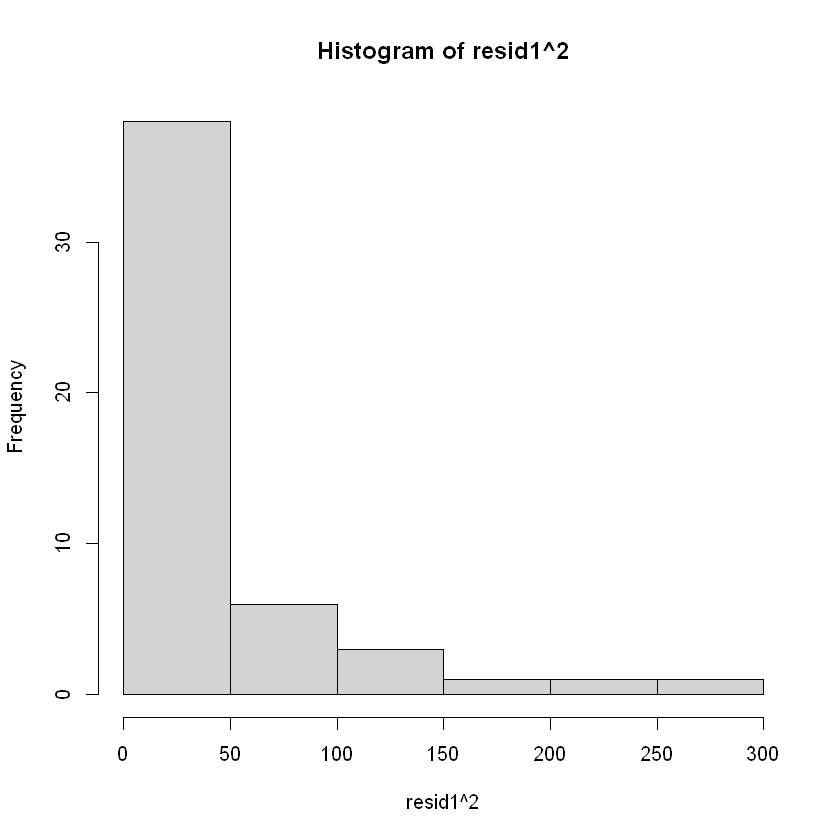

In [10]:
resid1 <-resid(mod1)
hist(resid1^2)

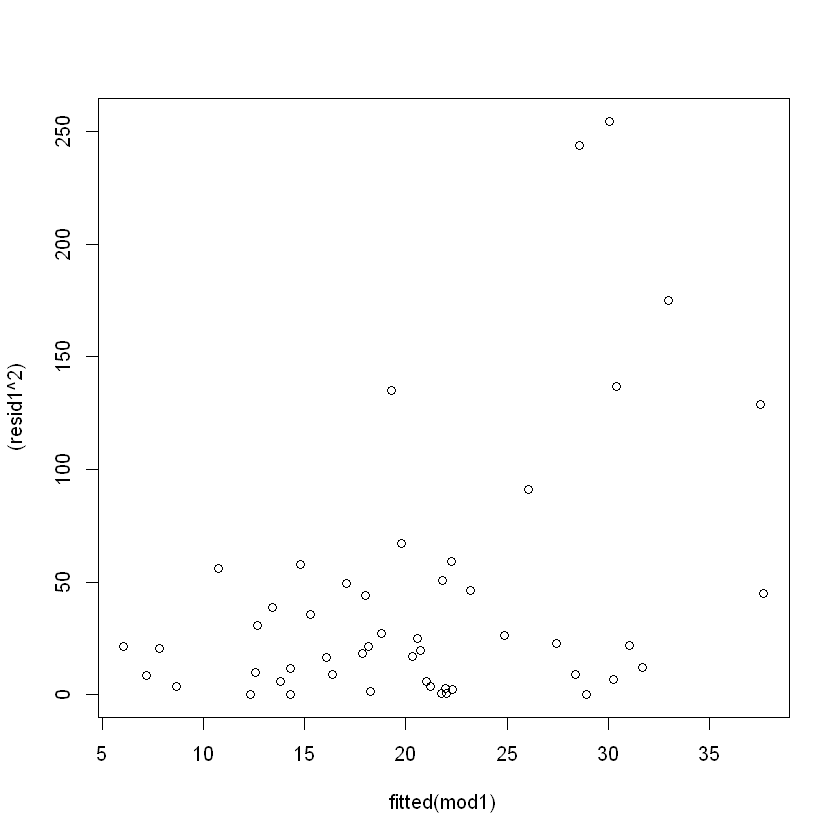

In [12]:
plot((resid1^2)~fitted(mod1))

### Formal tests

There are a number of tests to detect heteroskedasticity. Most of the test
are based on regression of $e_{i}^{2}$ and $\left\vert e_{i}\right\vert $ on $z_{i}.$ Where $z_{i}$ is an unknown 
variable and areusually proxied by explanatory variables ($x_{i},x_{i}^{2},x_{i}^{3},%
\widehat{y}^{2}...etc).$ \ The implicit assumption behind all these test is
that \ $var(\varepsilon_{i})=\sigma _{i}$ , and we can express this as function of
some unknown variable say $z_{i}$ (often proxied by some or all explanatory
variables in the model). Holding all other  assumptions under IC valid we
have $var(\varepsilon_{i})=E(\varepsilon_{i}^{2})=\sigma _{i}.$Hence a violation of
homoskedasticity can be tested by testing whether $\varepsilon^{2}$ is related some
unknown variables that cause the heteroskedasticity in our model. Various test are vailable in the literature. Some of them are given below.

#### Breusch and Pagan Test

Given the following model:

$\ddot{y}=\beta _{1}\ddot{x}_{1}+\beta \ddot{x}_{2}+...+\beta _{k}\ddot{x}_{k}+\varepsilon$ (variables are in
deviation form)

Breusch and Pagan Test  test the null hypothesis of homoskedasticity i.e. $%
H_{0}:var(\varepsilon)=E(\varepsilon^{2})=\sigma ^{2}$

This is done by estimating

$e^{2}=\delta _{1}\ddot{x}_{1}+\delta _{2}\ddot{x}_{2}+...+\delta _{k}\ddot{x}_{k}+v$
where is is the estimated value of $\varepsilon$

Then the null of homoskedasticity can be stated as follows

$H_{0}:\delta _{1}=\delta _{2}=...=\delta _{k}=0$

Now we can easily test the overall significance of the explanatory variables
in explaining $e^{2}$ using LM test or F test .

The LM statitics for heteroskedasticity can be calculated as follows

$LM=nR_{e}^{2}.$

LM follows a $\chi ^{2}$ distribution with k degrees of freedom . Where $%
R_{e}^{2}$ is the $R^{2}$ from the equation given above.

Remember the an F statistics can be computed using the $R_{e}^{2}$as follows

$F=\frac{R_{e}^{2}/k}{(1-R_{e}^{2})/(n-k)}$ $\ $\ where k is number
parameters, n is numbers of observations and the F statistics follows a  F
distribution with k and n-k d.f under the null

(Decision rule smaller p values reject the null of homoskedasticity)

In [21]:
library(lmtest)
bptest(mod1)



	studentized Breusch-Pagan test

data:  mod1
BP = 16.001, df = 7, p-value = 0.02511


#### The White Test

Similar to BP test the White test replaces the homoskedasticity assumptionby its weaker version where $\varepsilon^{2}$ is assumed to be uncorrelated with all the independent variables, square of independent variables and the cross products of independent variables. For instance consider a 3 explanatory variable model the White test is then based on the estimation of following model

$e^{2}=\delta _{1}\ddot{x}_{1}+\delta _{2}\ddot{x}_{2}+\delta _{3}\ddot{x}_{{3}%
}+\delta _{4}\ddot{x}_{1}^{2}+\delta _{5}\ddot{x}_{2}^{2}+\delta _{6}\ddot{x}_{{3}%
}^{2}+\delta _{7}\ddot{x}_{1}\ddot{x}_{2}+\delta _{8}\ddot{x}_{2}\ddot{x}_{3}+\delta _{9}\dot{x}_{1}\ddot{x}_{{3}%
}+v$

The White is test is to test the null where all $\delta _{i}=0$ for i
=1,2,..,9 using LM or F statistics.

alternatively we can replace the above equation with the following equation

$e^{2}=\delta _{1}\widehat{\ddot{y}}+\delta _{2}\widehat{\ddot{y}}^{2}+v$

then use LM or F statistics for the null $\delta _{1}$=0, $\delta _{2}=0$


In [46]:
mod2 <- lm(resid1^2~fitted(mod1)+fitted(mod1)^2)
summary(mod2)


Call:
lm(formula = resid1^2 ~ fitted(mod1) + fitted(mod1)^2)

Residuals:
   Min     1Q Median     3Q    Max 
-68.19 -36.32 -10.73  19.16 182.43 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)   
(Intercept)   -23.542     21.771  -1.081  0.28495   
fitted(mod1)    3.180      0.993   3.203  0.00242 **
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 53.13 on 48 degrees of freedom
Multiple R-squared:  0.1761,	Adjusted R-squared:  0.1589 
F-statistic: 10.26 on 1 and 48 DF,  p-value: 0.002419


## Solutions to The heteroskedasticity

There are mainly two types of solutions : General solutions and  solutions dependent on particular assumptions about $\sigma _{i}^{2}$. Let us consider some general solutions. They are

- Transforming the data to logs
- use heteroskedasticity robust standard error

we have already seen that under heteroskedasticity the OLS estimators are
unbiased but inefficient, and the standard error are also biased. In such
cases we can use the  heteroskedasticity consistant variance of the OLS
estimators. For example for a simple regression the hetroschedastity consisistant std error can be calsuated as follows $\hat{V}(\hat{\beta}_{j})=\frac{\sum v_{ij}^{2} {e}_{i}^{2}}{RSS_{j}},$ where $v_{ij}$ i residual from the auxiliary regression of $x_{j}$
on all other independent variables. And $RSS_{j}$ is the residual sum of
squares from the same auxiliary regression. The square root of the above
equation is known as heteroskedasticity -robust standard errors or White
Huber Eicker standard error.



In [48]:
library("car")
cov1 <- hccm(mod1, type="hc1") #needs package 'car'
mod3 <- coeftest(mod1, vcov.=cov1)
mod3

Loading required package: carData




t test of coefficients:

               Estimate  Std. Error t value  Pr(>|t|)    
(Intercept) 14.28395728 14.90146001  0.9586  0.343266    
price       -0.04236311  0.02594399 -1.6329  0.109973    
laws        -0.87310179  1.79584917 -0.4862  0.629368    
funds        2.82000302  3.08857928  0.9130  0.366432    
educ        -0.28725512  0.17662801 -1.6263  0.111361    
religion     0.02007090  0.08386115  0.2393  0.812010    
income       0.00240068  0.00051019  4.7055 2.753e-05 ***
picket      -0.11687121  0.04042007 -2.8914  0.006049 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
